# <p style="background-color:#B0766D;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Iris Dataset Exploratory Data analysis</p>
<img src="https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png" style="display: block; margin: 0 auto;">

Problem Statement: To classify a given Iris flower into setosa, versicolor or virginica based on it's features; Sepal Length, Sepal Width, Petal Length and Petal width.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
len(sns.get_dataset_names())

22

In [3]:
Iris = sns.load_dataset('iris')

In [4]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [124]:
Iris.shape

(150, 5)

In [125]:
print('The shape of the Dataset is ', Iris.shape)
print('--------------')
print('The columns of the dataset are ', Iris.columns)
print('--------------')


The shape of the Dataset is  (150, 5)
--------------
The columns of the dataset are  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
--------------


In [126]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
Iris.tail(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Inference:
There are 150 observations in the dataset and there are 6 columns.


In [128]:
#creating a list that would contain column names as elements.
col_list = list(Iris.columns)
col_list

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [129]:
#getting the list of number of unique valuess in each column
for column in col_list:
    print('There are {} unique values in the column {}'.format(Iris[column].nunique(), column))

There are 35 unique values in the column sepal_length
There are 23 unique values in the column sepal_width
There are 43 unique values in the column petal_length
There are 22 unique values in the column petal_width
There are 3 unique values in the column species


In [130]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Inference:
1. Column 'Id' contains 150 unique values and ID is just a sequential number assigned to observation. Hence, It is not required for the dataset and needs to be droppped.
2. There are 3 class labels in target vector **Species**

In [131]:
Iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Inference:

1. All values contain 150 observations.
2. Column SepalLengthCm ranges from 4.3 to 7.9.
3. Column SepalWidthCm ranges from 2.0 to 4.4.
4. Column PetalLengthCm ranges from 1.0 to 6.9.
5. Column PetalWidthCm ranges from 0.1 to 2.5.

In [132]:
Iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [133]:
Iris.duplicated().sum()

1

In [134]:
Iris = Iris.drop_duplicates()

In [135]:
Iris.duplicated().sum()

0

In [136]:
cat_cols=Iris.select_dtypes(include=['object']).columns
num_cols = Iris.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['species'], dtype='object')
Numerical Variables:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


Inference:

1. There are only 150 datapoints in the dataset. 
2. No column contains missing values.
3. No datatype conversion is required for any column.


In [137]:
Iris['species'].nunique()

3

In [138]:
pie_df = pd.DataFrame(Iris['species'].value_counts())
pie_df

,count
species,
setosa,50
versicolor,50
virginica,49


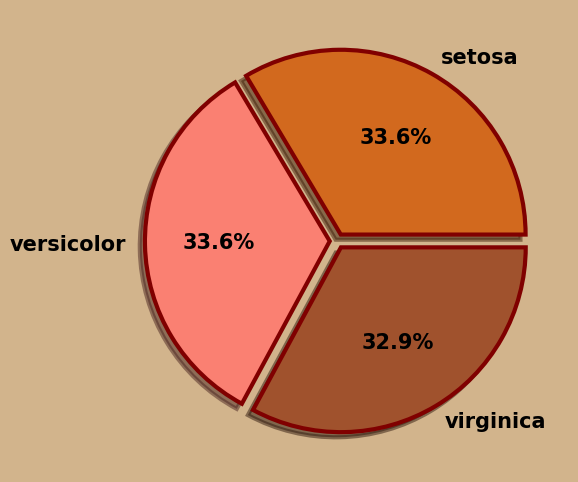

In [139]:
plt.figure(figsize=(6,6))
plt.pie(pie_df['count'],
        labels=pie_df['count'].index, 
        autopct='%.1f%%', shadow=True,
        explode=(0.04, 0.04, 0.04),
        colors=['chocolate','salmon','sienna'],
        wedgeprops={'linewidth':3, 
                    'edgecolor':'maroon'},
        textprops={'fontweight':'bold',
                   'fontsize':15,
                   'color':'black'})
cf=plt.gcf()
cf.set_facecolor('tan')
plt.show()

Inference:

All the class labels have almost equal observation counts. Data set is balanced.

Inference:

Outliers are observed only in SepalWidth

#### A. Univariate Analysis

**1. 1D Scatter plot**

Let's put 1D scatter plot by considering each f the column with respct to corresponding class label group.

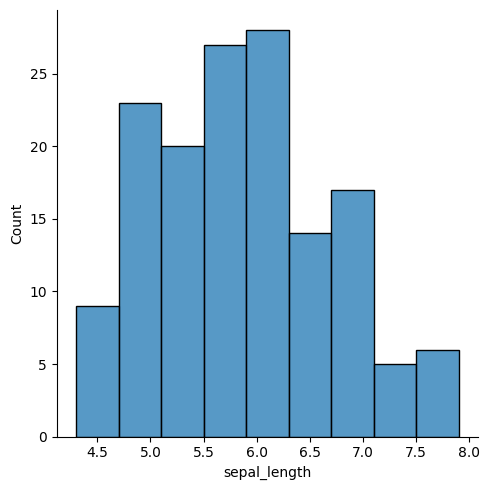

In [140]:
sns.displot(Iris['sepal_length'])
plt.show()

We are not able to infer anything from the above plot that would be helpful to problem statement. Hence, let's plot 1-D scatter plot in the context of target vector.

In [141]:
#Let me create group of datasets with respect to unique values in 'Specie' column(Class labels)

#g_set = Iris.groupby('Species')
#Iris_setosa = g_set.get_group('Iris-setosa')
#Iris_versicolor = g_set.get_group('Iris-versicolor')
#Iris_virginica = g_set.get_group('Iris-virginica')

Iris_setosa = Iris[Iris['species']=='setosa']
Iris_versicolor = Iris[Iris['species']=='versicolor']
Iris_virginica = Iris[Iris['species']=='virginica']

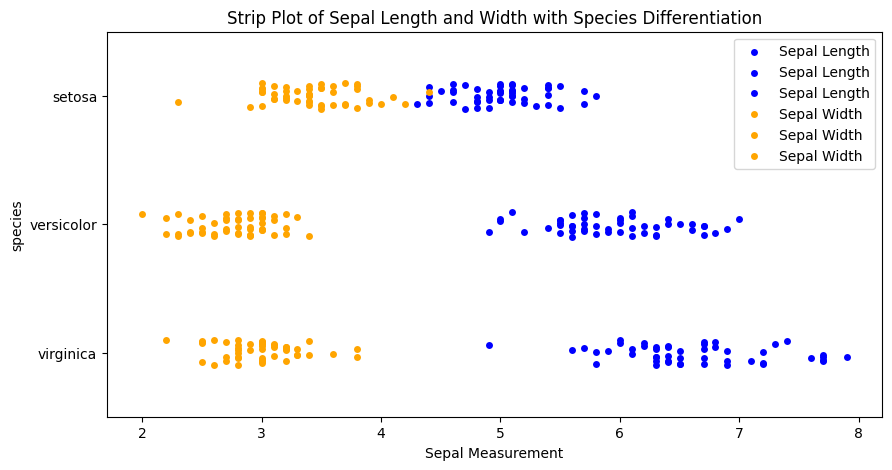

In [142]:
# Combine 'sepal_length' and 'sepal_width' in one plot
plt.figure(figsize=(10, 5))
sns.stripplot(x='sepal_length', y='species', data=Iris, jitter=True, label='Sepal Length', color='blue')
sns.stripplot(x='sepal_width', y='species', data=Iris, jitter=True, label='Sepal Width', color='orange')

plt.title('Strip Plot of Sepal Length and Width with Species Differentiation')
plt.xlabel('Sepal Measurement')
plt.legend()
plt.show()

Inference:
Using Sepal Length alone It is not possible to differentiate between Iris flowers. We are not able to differentiate overlap.

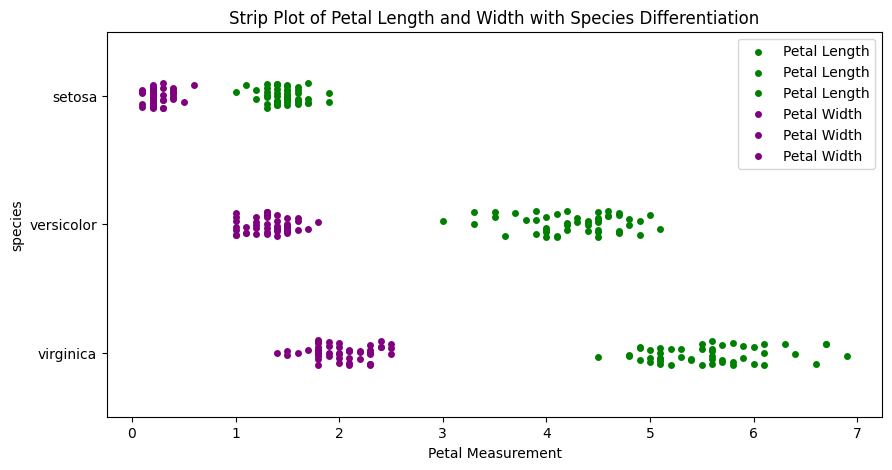

In [155]:
# Combine 'PetalLength' and 'PetalWidth' in one plot
plt.figure(figsize=(10, 5))
sns.stripplot(x='petal_length', y='species', data=Iris, jitter=True, label='Petal Length', color='green')
sns.stripplot(x='petal_width', y='species', data=Iris, jitter=True, label='Petal Width', color='purple')

plt.title('Strip Plot of Petal Length and Width with Species Differentiation')
plt.xlabel('Petal Measurement')
plt.legend()
plt.show()

Inference:
1. If PL is less than 2, it is setosa
2. Slight overlap between versicolor and virginica but indeterminable.
3. Setosa is separable(<0.6)
4. Overlap between virginica and versicolor is not distinguishable

**2. Univariate analysis using Histogram**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


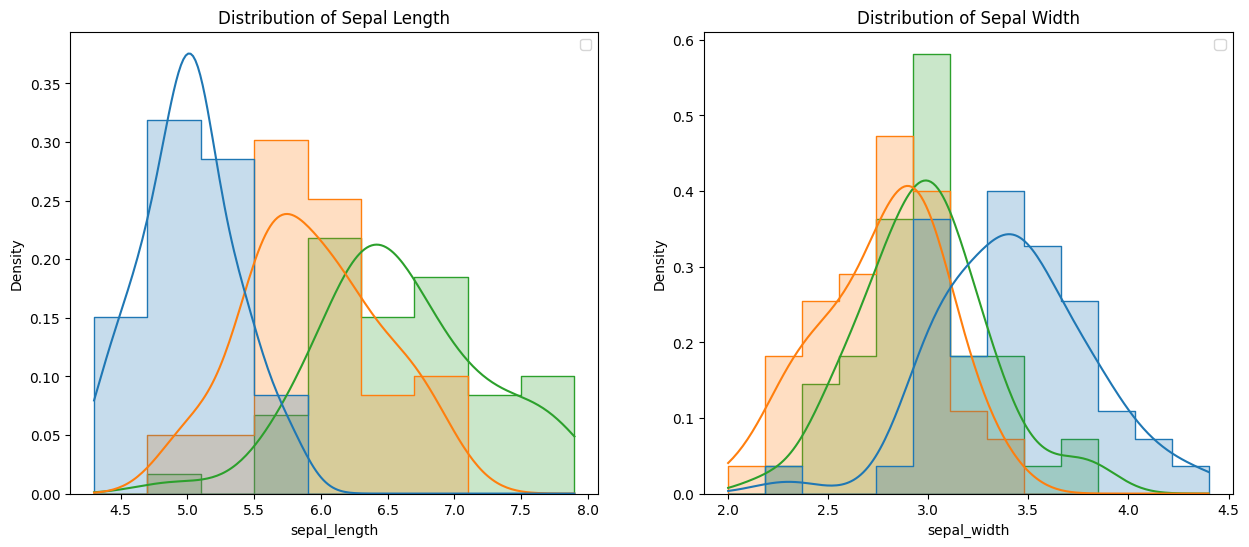

In [153]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Subplot 1: Sepal Length
sns.histplot(data=Iris, x='sepal_length', hue='species', kde=True, ax=axes[0], element='step', stat='density')
axes[0].set_title('Distribution of Sepal Length')
axes[0].legend()

# Subplot 2: Sepal Width
sns.histplot(data=Iris, x='sepal_width', hue='species', kde=True, ax=axes[1], element='step', stat='density')
axes[1].set_title('Distribution of Sepal Width')
axes[1].legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


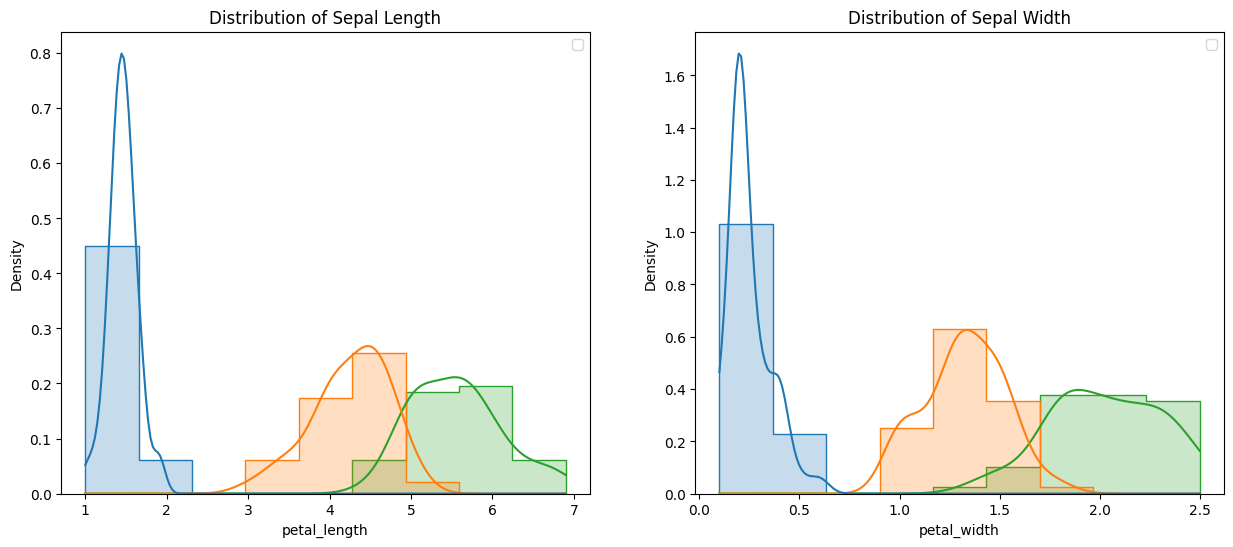

In [156]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Subplot 1: Sepal Length
sns.histplot(data=Iris, x='petal_length', hue='species', kde=True, ax=axes[0], element='step', stat='density')
axes[0].set_title('Distribution of Sepal Length')
axes[0].legend()

# Subplot 2: Sepal Width
sns.histplot(data=Iris, x='petal_width', hue='species', kde=True, ax=axes[1], element='step', stat='density')
axes[1].set_title('Distribution of Sepal Width')
axes[1].legend()

plt.show()

Probability Density Function and Cumulative Distribution Function

Box-Whiskers plot

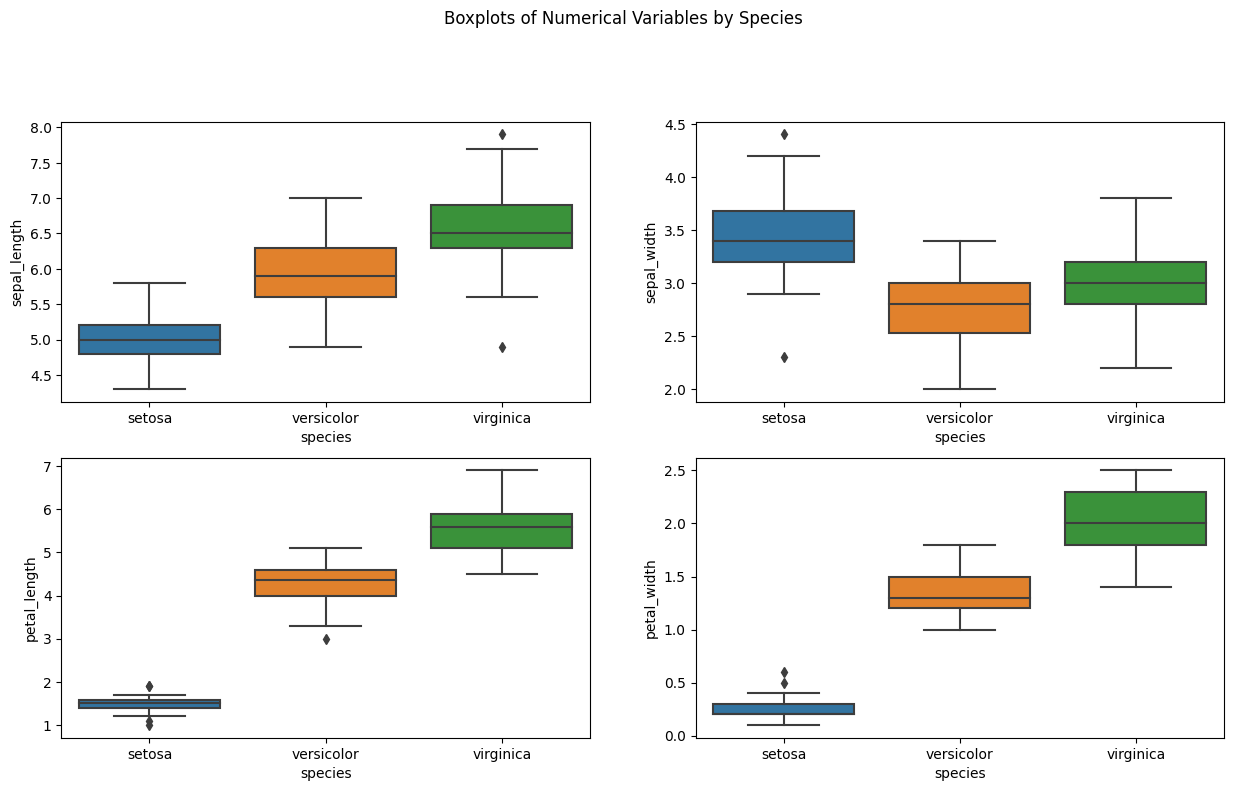

In [158]:
# Boxplots to identify outliers and distribution of numerical variables
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=Iris)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=Iris)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=Iris)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=Iris)
plt.suptitle('Boxplots of Numerical Variables by Species', y=1.02)
plt.show()


#### B. Bivariate Analysis

1. 2D Scatter Plot

We are not able to infer anything from the above scatter plot which would help us to solve our problem statement, hence let's add 'hue' attribute/argument form Seaborn which would give us color segmentation based on a given column.

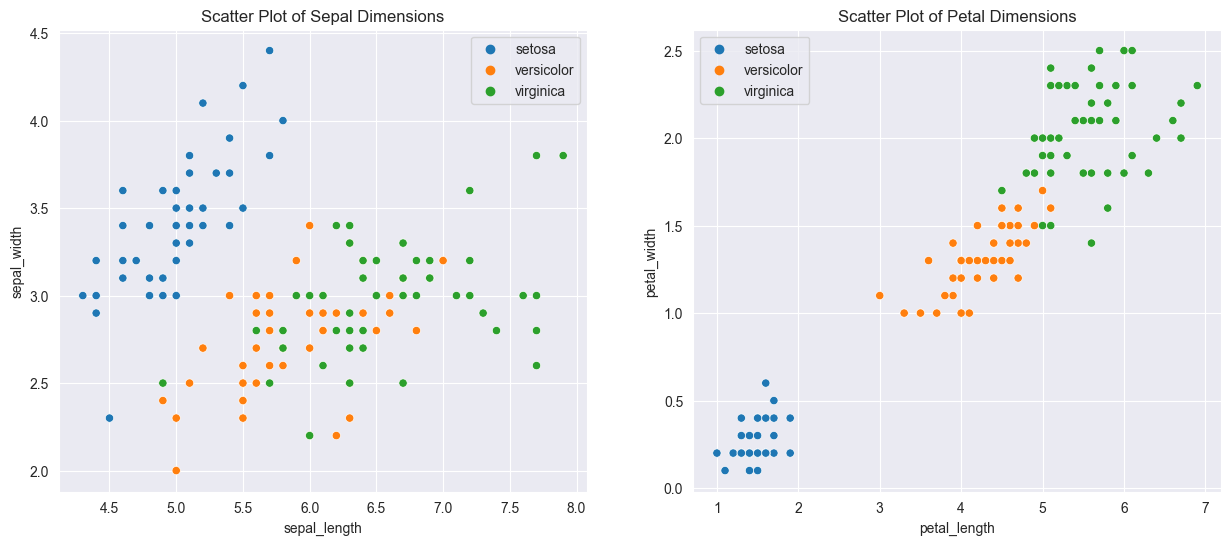

In [161]:
# Set the darkgrid style
sns.set_style('darkgrid')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for Sepal dimensions
sns.scatterplot(data=Iris, x='sepal_length', y='sepal_width', hue='species', ax=axes[0])
axes[0].set_title('Scatter Plot of Sepal Dimensions')
axes[0].legend()

# Scatter plot for Petal dimensions
sns.scatterplot(data=Iris, x='petal_length', y='petal_width', hue='species', ax=axes[1])
axes[1].set_title('Scatter Plot of Petal Dimensions')
axes[1].legend()

plt.show()

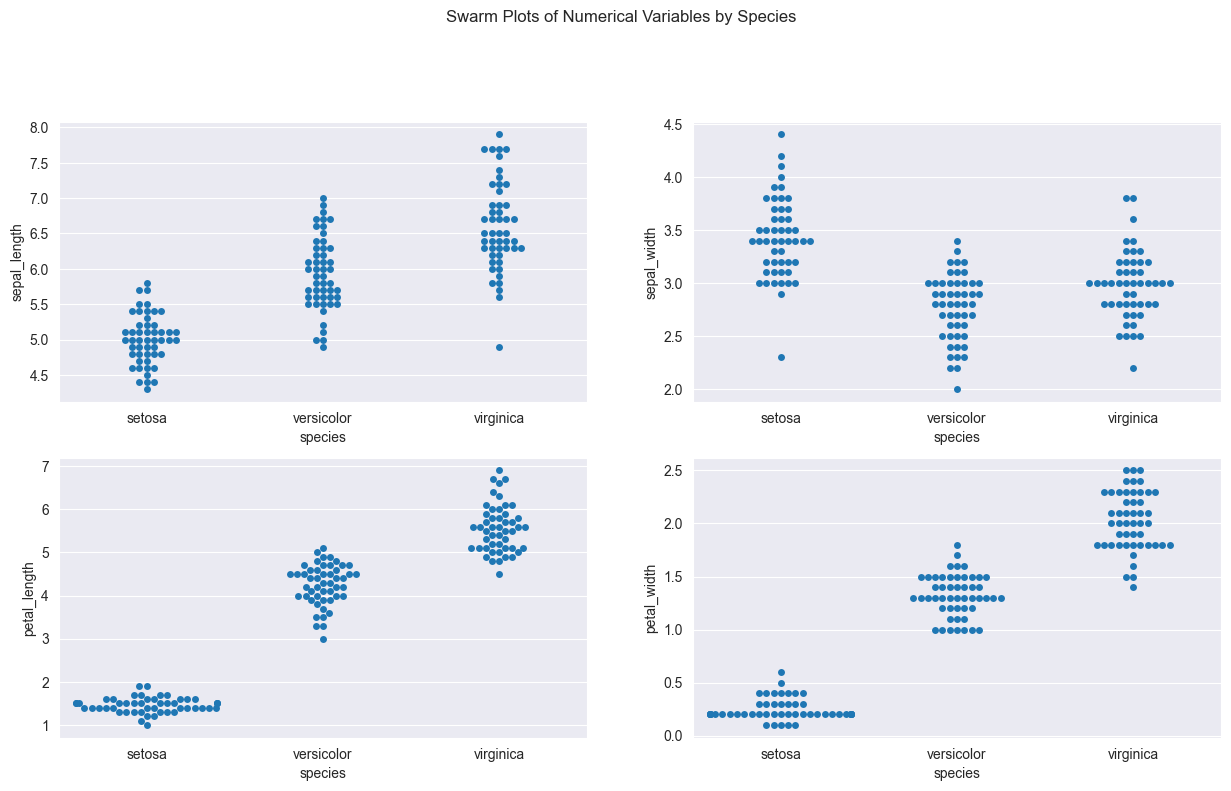

In [165]:
# Swarm plot to visualize the distribution of numerical variables
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.swarmplot(x='species', y='sepal_length', data=Iris)
plt.subplot(2, 2, 2)
sns.swarmplot(x='species', y='sepal_width', data=Iris)
plt.subplot(2, 2, 3)
sns.swarmplot(x='species', y='petal_length', data=Iris)
plt.subplot(2, 2, 4)
sns.swarmplot(x='species', y='petal_width', data=Iris)
plt.suptitle('Swarm Plots of Numerical Variables by Species', y=1.02)
plt.show()

It would be difficult or not feasible to write different code for each set of columns for a 2D scatter plot. Hence let's make use of pair plot.

<Figure size 5000x7500 with 0 Axes>

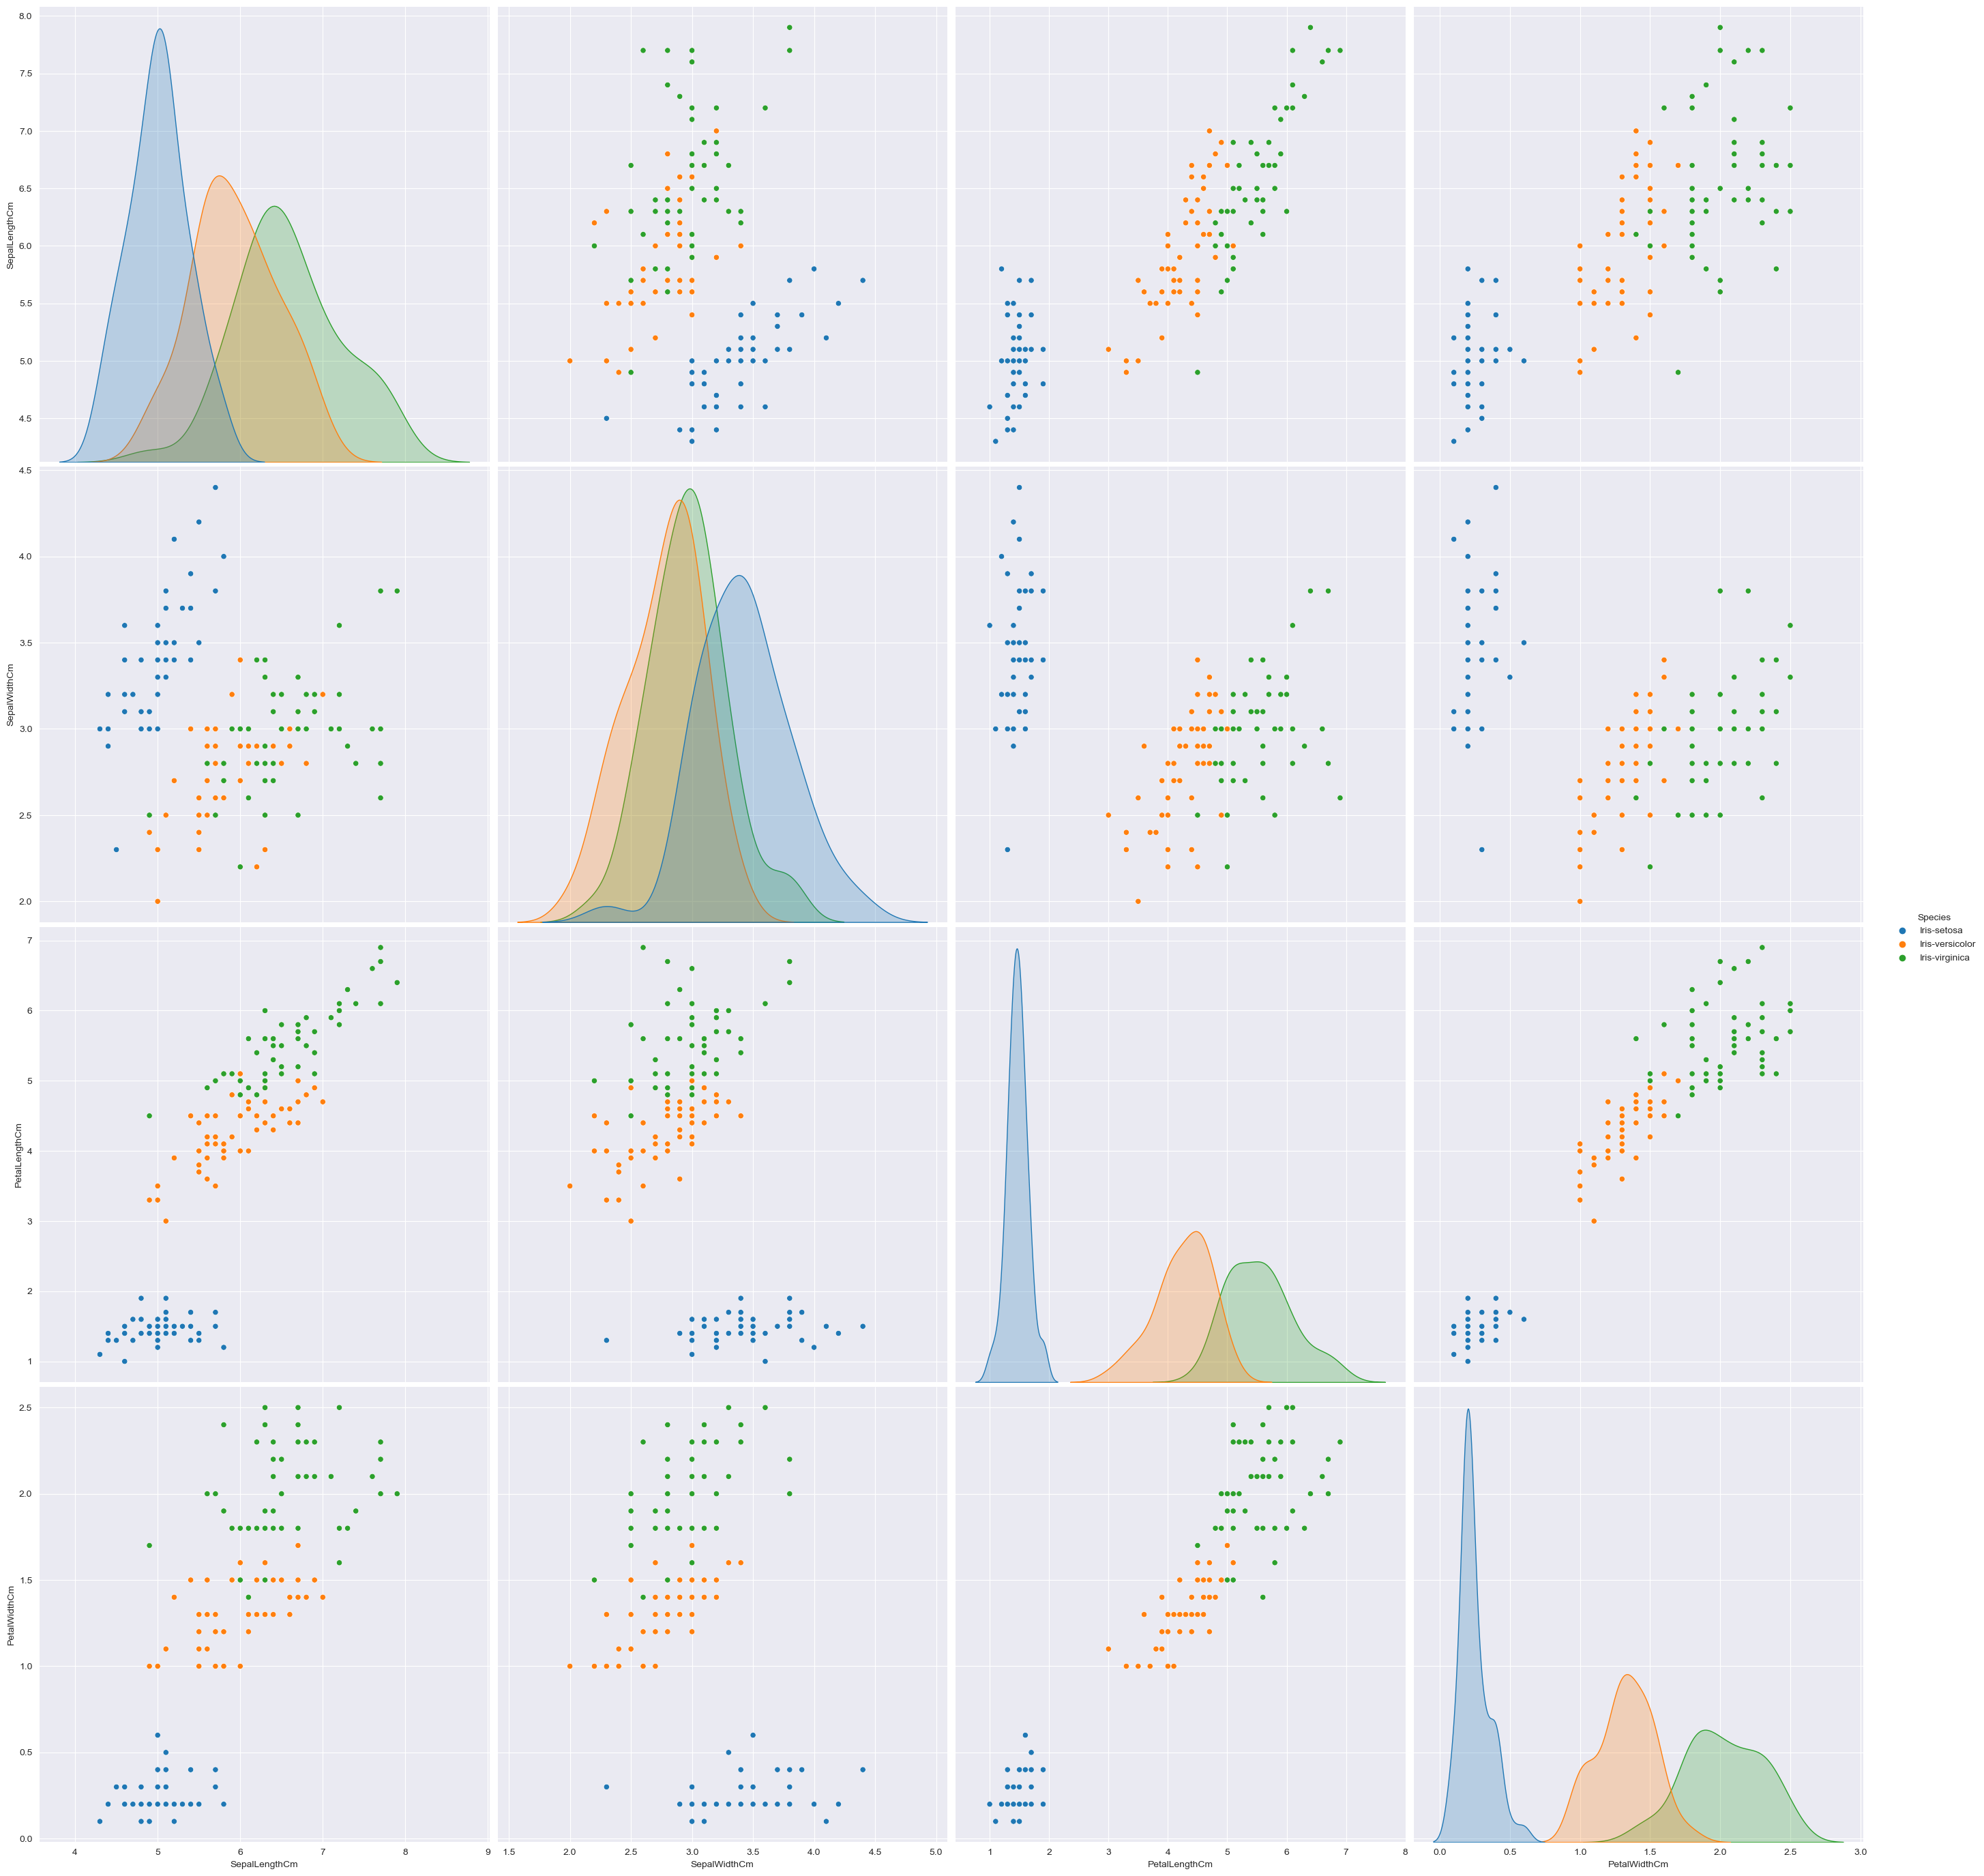

In [ ]:

plt.figure(figsize=(50,75))
sns.pairplot(Iris, hue='Species', height=7)
plt.show()

<Axes: >

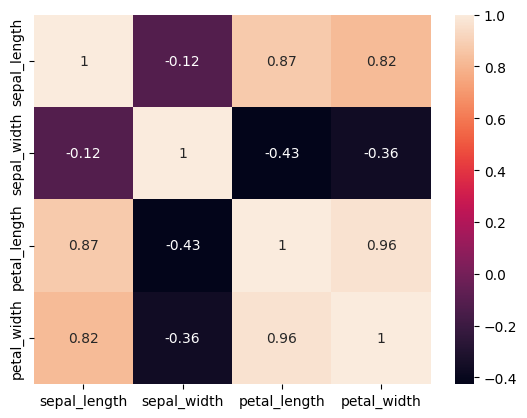

In [144]:
sns.heatmap(Iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot=True)

#### C. Multivariate analysis

1. 3D scatter plot

In [162]:
import plotly.express as px
fig = px.scatter_3d(Iris, x='sepal_length', y='petal_length', z='petal_width',
              color='species',color_discrete_sequence=px.colors.qualitative.Bold, width=800, height=800)
fig.show()